Goals

Head to head comparison against my favorite summoners
least purchased units(learn to improve)



In [219]:
pip install riotwatcher

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [224]:
from riotwatcher import TftWatcher
import pandas as pd
import plotly.graph_objects as go
import numpy as np

api_key = 'RGAPI-3a901551-a81c-4868-bde7-caf333da1969'
watcher = TftWatcher(api_key)
my_region = 'na1'
summoner_name = 'iseo3'

me = watcher.summoner.by_name(my_region, summoner_name)

for key in me:
    print(key, ':', me[key])

id : FAzzVwB_eIfYwoThyJoV5z1t_-w1DeLV4vBKKniqsCm9fLU
accountId : NkgqfQNyMndDHUzTSM3-Kwbs-mDE49UD_7zUeaQSjTRDVtk
puuid : pmUJnHnXqtC-GRocpxePNLY59KaFhJuytEVUdIM7L6chNQjsL2GlEmGSYS7ZeS-FlNCsQSiXuzvPJg
name : iseo3
profileIconId : 4162
revisionDate : 1705023568000
summonerLevel : 361


In [226]:
matches_ids = watcher.match.by_puuid(my_region, me['puuid'], count=20)
matches = [watcher.match.by_id(my_region, item) for item in matches_ids]

In [228]:
matches[0].keys()

"""
dict_keys(['metadata', 'info'])
"""

matches[0]['metadata']

#matches[0]['info'].keys()

{'data_version': '5',
 'match_id': 'NA1_4888570723',
 'participants': ['fZMpTzgLiD1OxjxJv_j1O9IyoBBCMYfYfTJkHplesTitBN83WXo3hW020GlgK3Wpm_kxcE_HJgEduw',
  'iB3PAFjGNcFCCQNEzA4EV5rcOI_K4c0uq9QUprl31hpOr6GtynougUfdznL0vPt_n38XzN4Us2NMGw',
  '_Sxmaiuu0N-DMXc7LYELtjEHiCM1NBj77GYHsmIY6pAPB61XPWU-PCmKKhhfcjCE57Sp8umddh4yMg',
  'yqRTRdIWND0RC0mzNPZjhR6rb91eHBJFIU2TV-692iIB61NPVv_7Pkb4qLlSvHtiR4aZXgOihJQaVA',
  '1J4RyzoC7zyUGSKhLT8S_F5xiuGuNKxDgXumbql1HeEf7Y5PcK458FKhk4SiCVywgMM7GR2vSylDbg',
  'pmUJnHnXqtC-GRocpxePNLY59KaFhJuytEVUdIM7L6chNQjsL2GlEmGSYS7ZeS-FlNCsQSiXuzvPJg',
  'LBHsjc4nJ8_j8NdSEJJEtPxorXubAvbs9IIHcaZTQfZNBiEK4eNnm_hKX04biC2TiGuuJCP0t-xiNQ',
  'OCKcS6KQVv0VBHWlwRw_YRyP8yRkagmdxh_vkTWocPblilZgaQ3P7Mczl9e0FsGm3xYxaAC_-qcpxw']}

In [230]:
my_match_data = matches[0]['info']['participants'][matches[0]['metadata']['participants'].index(me['puuid'])]
my_match_data.keys()

"""
dict_keys(['augments', 'companion', 'gold_left', 'last_round', 'level', 'placement', 'players_eliminated', 'puuid', 'time_eliminated', 'total_damage_to_players', 'traits', 'units'])
"""

print(my_match_data['augments'])
"""
['TFT6_Augment_Electrocharge1',
 'TFT8_Augment_DravenCarry',
 'TFT6_Augment_Ascension']
"""

print(my_match_data['placement'])

"""
2
"""

my_match_data['units'][:2]

['TFT10_Augment_VampirismPlus', 'TFT10_Augment_TalentSearch', 'TFT6_Augment_Recombobulator']
5


[{'character_id': 'TFT10_Garen',
  'itemNames': [],
  'name': '',
  'rarity': 1,
  'tier': 2},
 {'character_id': 'TFT10_MissFortune',
  'itemNames': [],
  'name': '',
  'rarity': 2,
  'tier': 2}]

In [232]:
import json
import operator
with open('units.json', 'w') as file:
    json.dump(my_match_data['units'], file, indent=4)
#store unit data

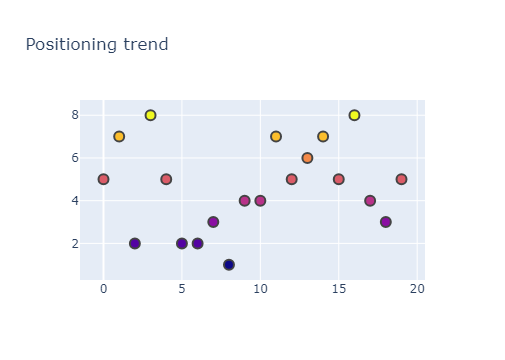

In [264]:
from __future__ import annotations

def get_placement_trend(matches: list | np.ndarray, puuid = str) -> np.ndarray:
    """
    :param matches: list of matches
    :return np.ndarray placement_trend:
    """

    placement_trend = []
    for match in matches:
        my_match_data = match['info']['participants'][match['metadata']['participants'].index(puuid)]
        placement_trend.append(int(my_match_data['placement']))
    
    return np.array(placement_trend, dtype=np.int32)

placements = get_placement_trend(matches=matches,puuid=me['puuid'])
x = np.arange(len(placements))

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x, y=placements,
    name='sin',
    mode='markers',
    marker_color=placements
))


fig.update_traces(mode='markers', marker_line_width=2, marker_size=10)
fig.update_layout(title='Positioning trend', width=800)

In [353]:
def compareSummoners(name1, name2, region,api_key,num):
    watcher = TftWatcher(api_key)

    sum1 = watcher.summoner.by_name(region, name1)
    puuid1 = sum1["puuid"]

        
    sum2 = watcher.summoner.by_name(region, name2)
    puuid2 = sum2["puuid"]

        
    #find all games within certain range(last x games) where both puuid are in the
    #same game, compare head to head placement, keep score and percentage
    #can graph trend over time as well
    
    #metadata and info, 
    #metadata is data version, match_id, participants
    #info is a dict inside a dict, keys:(['game_datetime', 'game_length', 'game_version', 'participants', 'queue_id', 'tft_game_type', 'tft_set_core_name', 'tft_set_number'])
    #participants is a list of strings
    
    shared_games = []
    matches_ids = watcher.match.by_puuid(region, puuid1, count=num)
    matches = [watcher.match.by_id(region, item) for item in matches_ids]
    count = 0
    sum1 = 0
    sum2 = 0
    h2h = 0
    p1= []
    p2 =[]
    dt = []
    for match in matches:
        if operator.contains(match['metadata']['participants'],puuid2):
            print("match found")
            shared_games.append(match['metadata']['match_id'])
            dt.append(match['info']['game_datetime'])
            data1 = match['info']['participants'][match['metadata']['participants'].index(puuid1)]
            data2 = match['info']['participants'][match['metadata']['participants'].index(puuid2)]
            p1.append(data1['placement'])
            p2.append(data2['placement'])
            print('data1: ',p1[-1])
            print('data2: ',p2[-1])
            sum1+= p1[-1]
            sum2+= p2[-1]
            if p1[-1]< p2[-1]:
                h2h+=1
            count+=1
            #matches[0]['info']['participants'][matches[0]['metadata']['participants'].index(me['puuid'])]
            #data1 = ['metadata']['participants'].index(me['puuid'])
    avg_placement1 = float(sum1)/count
    avg_placement2 = float(sum2)/count
    watcher.match.by_id(region,shared_games[0])
    ret = [p1, p2, count, h2h, avg_placement1, avg_placement2, dt]
    return ret

In [309]:
compareSummoners("iseo3","CookiesOP","na1",api_key,35)

match found
data1:  4
data2:  8
match found
data1:  8
data2:  4
match found
data1:  6
data2:  5
avg placement: 6.0
opponent avg placment:  5.666666666666667
num times you placed lower:  1
num times they placed lower:  2


[[4, 8, 6],
 [8, 4, 5],
 3,
 1,
 6.0,
 5.666666666666667,
 [1704932458678, 1704863669425, 1704837041690]]

In [406]:
import datetime
def placement_comparison(name1, name2, region,api_key,num):
    values = compareSummoners(name1, name2, region,api_key,num)
    placements1 = values[0]
    placements2 = values[1]
    times = []
    for time in values[-1]:
        time = datetime.datetime.fromtimestamp(time/1000)
        print('time:',time)
        times.append(time)
    x = np.arange(len(placements1))

    fig = go.Figure()

    fig.add_trace(go.Scatter(
    x=times, y=placements1,
    name= name1,
    mode='markers',
    marker_color= 'blue'
))
    fig.add_trace(go.Scatter(
    x=times, y=placements2,
    name=name2,
    mode='markers',
    marker_color= 'red'
))


    fig.update_traces(mode='markers', marker_line_width=2, marker_size=10)
    fig.update_layout(title='Positioning trend', width=800)
    fig.show()
    num_spaces = 7
    spacer = ""
    for x in range (num_spaces):
        spacer = spacer + " "
    length = len(name1)
    s = ""
    for i in range(length+num_spaces-1):
        s = s + " "
    print(name1, spacer, "|", spacer, name2)
    for n in range(values[2]):
        print(values[0][n], s, "|", s, values[1][n])
    print('')
    print('avg placement:', values[4])
    print('opponent avg placment: ', values[5])
    print('num times you placed lower: ', values[3])
    print('num times they placed lower: ', values[2]-values[3])

match found
data1:  4
data2:  8
match found
data1:  8
data2:  4
match found
data1:  6
data2:  5
time: 2024-01-11 00:20:58.678000
time: 2024-01-10 05:14:29.425000
time: 2024-01-09 21:50:41.690000


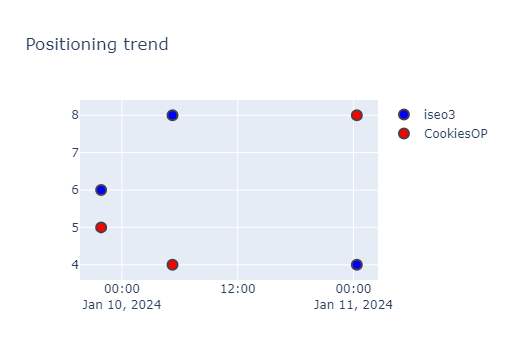

iseo3         |         CookiesOP
4             |             8
8             |             4
6             |             5

avg placement: 6.0
opponent avg placment:  5.666666666666667
num times you placed lower:  1
num times they placed lower:  2


In [410]:
placement_comparison("iseo3","CookiesOP","na1",api_key,100)